In [41]:
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [42]:
df = pd.read_parquet('../../data/processed/ds_labeled.parquet')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460509 entries, 0 to 460508
Data columns (total 17 columns):
 #   Column                              Non-Null Count   Dtype              
---  ------                              --------------   -----              
 0   id_prenotazione                     460509 non-null  object             
 1   id_paziente                         460509 non-null  object             
 2   data_nascita                        460509 non-null  datetime64[ns, UTC]
 3   sesso                               460509 non-null  object             
 4   regione_residenza                   460509 non-null  object             
 5   tipologia_servizio                  460509 non-null  object             
 6   descrizione_attivita                460509 non-null  object             
 7   data_contatto                       460509 non-null  object             
 8   tipologia_struttura_erogazione      460509 non-null  object             
 9   id_professionista_sanitari

In [44]:
cols_to_drop = df.columns[[0,1,2,5,6,7,9,10,11,16]]
df = df.drop(columns=cols_to_drop)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460509 entries, 0 to 460508
Data columns (total 7 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   sesso                           460509 non-null  object
 1   regione_residenza               460509 non-null  object
 2   tipologia_struttura_erogazione  460509 non-null  object
 3   durata_erogazione_sec           460509 non-null  int64 
 4   eta                             460509 non-null  int64 
 5   anno                            460509 non-null  int32 
 6   quadrimestre                    460509 non-null  int32 
dtypes: int32(2), int64(2), object(3)
memory usage: 21.1+ MB


## Elbow Method

L'Elbow Method consiste nel:

1. Eseguire K-Prototypes per una gamma di valori di 
𝑘 (ad esempio, da 1 a 10).
2. Calcolare il "Costo" (o l'inertia): La funzione di costo (inertia) misura la somma delle distanze tra i punti dati e i loro rispettivi centroidi.
3. Tracciare il Costo: Tracciare il costo rispetto ai diversi valori di 
𝑘.
4. Identificare l'Elbow (gomito): Il punto in cui il tasso di riduzione della funzione di costo inizia a diminuire significativamente. Questo punto rappresenta il numero ottimale di cluster.

In [46]:
#X = df.to_numpy()

In [47]:
categorical_columns = [0, 1, 2]

In [48]:
cost = []
K = range(3, 10) # Range di valori per k (numero di cluster)

In [49]:
for numero_cluster in K:
    kproto = KPrototypes(n_clusters=numero_cluster, init='Huang', n_init = 3 , verbose=1)
    kproto.fit_predict(df, categorical = categorical_columns)
    cost.append(kproto.cost_)

Init: initializing centroids
Init: initializing clusters


In [ ]:
# Grafica il costo per ogni k
plt.plot(K, cost, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

## KPrototypes



- n_clusters=3`: Questo è il numero di cluster che l'algoritmo cercherà di identificare nei tuoi dati. In questo caso, stai chiedendo all'algoritmo di trovare 3 cluster.
- init='Huang'`: Questo è il metodo di inizializzazione che l'algoritmo utilizzerà per inizializzare i centroidi. In questo caso, stai utilizzando il metodo di inizializzazione di Huang.
- n_init=5`: Questo è il numero di volte che l'algoritmo verrà eseguito con diverse inizializzazioni dei centroidi. L'algoritmo restituirà il modello con la migliore inizializzazione.
- verbose=1`: Questo è il livello di verbosità dell'algoritmo. Più alto è il valore, più informazioni verranno stampate a schermo durante l'esecuzione dell'algoritmo.

In [ ]:
# Crea un'istanza dell'algoritmo K-Prototype
kproto = KPrototypes(n_clusters=2, init='Huang', n_init=5, verbose=1)


In [ ]:
# Adatta l'algoritmo ai dati
# Devi specificare le colonne dei dati categorici
clusters = kproto.fit_predict(df, categorical=[0, 1, 2])  # sostituisci con le tue colonne categoriche

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 20111, ncost: 155075527646.52753
Run: 1, iteration: 2/100, moves: 8700, ncost: 154497244262.92938
Run: 1, iteration: 3/100, moves: 3027, ncost: 154428469586.08032


KeyboardInterrupt: 

In [ ]:
#    clusters
#    centroids = kproto.cluster_centroids_
#    print(centroids)

[['3525.631986031171' '43.68442087563862' '2020.6192912112786'
  '2.573950721076117' 'female' 'Lombardia' 'Ospedale a gestione diretta']
 ['899.7216741769172' '43.55784922664718' '2020.6171463754583'
  '2.575373144426853' 'female' 'Lombardia' 'Ospedale a gestione diretta']
 ['2173.826740721529' '43.54020407259569' '2020.6260018598061'
  '2.5658175239276066' 'female' 'Lombardia' 'Ospedale a gestione diretta']]


In [ ]:
# Crea un DataFrame per i centroidi
#df_centroids = pd.DataFrame(centroids)
#df_centroids['cluster'] = range(len(df_centroids))

# Visualizza i centroidi
#print(df_centroids)

                   0                  1                   2  \
0  3525.631986031171  43.68442087563862  2020.6192912112786   
1  899.7216741769172  43.55784922664718  2020.6171463754583   
2  2173.826740721529  43.54020407259569  2020.6260018598061   

                    3       4          5                            6  cluster  
0   2.573950721076117  female  Lombardia  Ospedale a gestione diretta        0  
1   2.575373144426853  female  Lombardia  Ospedale a gestione diretta        1  
2  2.5658175239276066  female  Lombardia  Ospedale a gestione diretta        2  


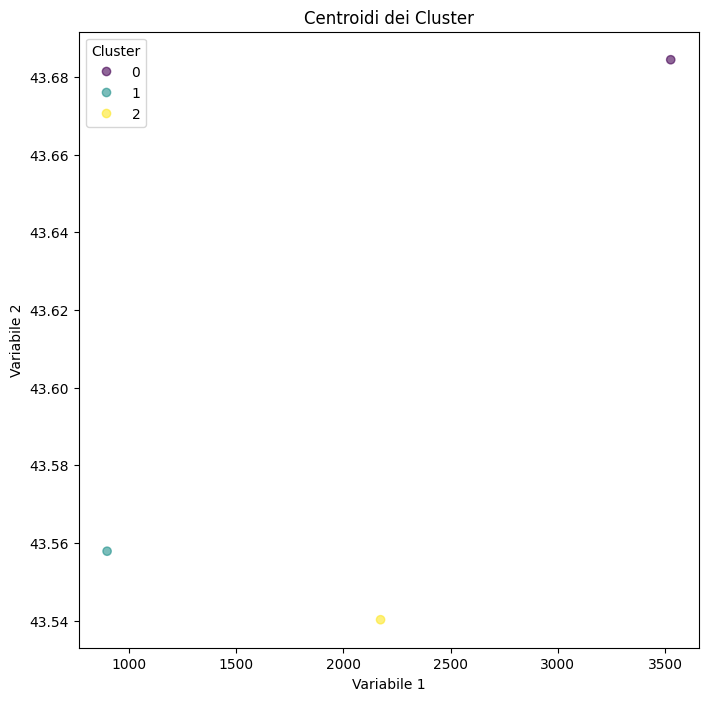

In [ ]:
# Converti le colonne numeriche in float
#df_centroids[[0, 1, 2, 3]] = df_centroids[[0, 1, 2, 3]].astype(float)

# Ora puoi visualizzare i tuoi centroidi in un grafico
#plt.figure(figsize=(8,8))
#scatter = plt.scatter(df_centroids[0], df_centroids[1], c=df_centroids['cluster'], alpha=0.6)
#plt.title('Centroidi dei Cluster')
#plt.xlabel('Variabile 1')
#plt.ylabel('Variabile 2')
#plt.legend(*scatter.legend_elements(), title="Cluster")
#plt.show()

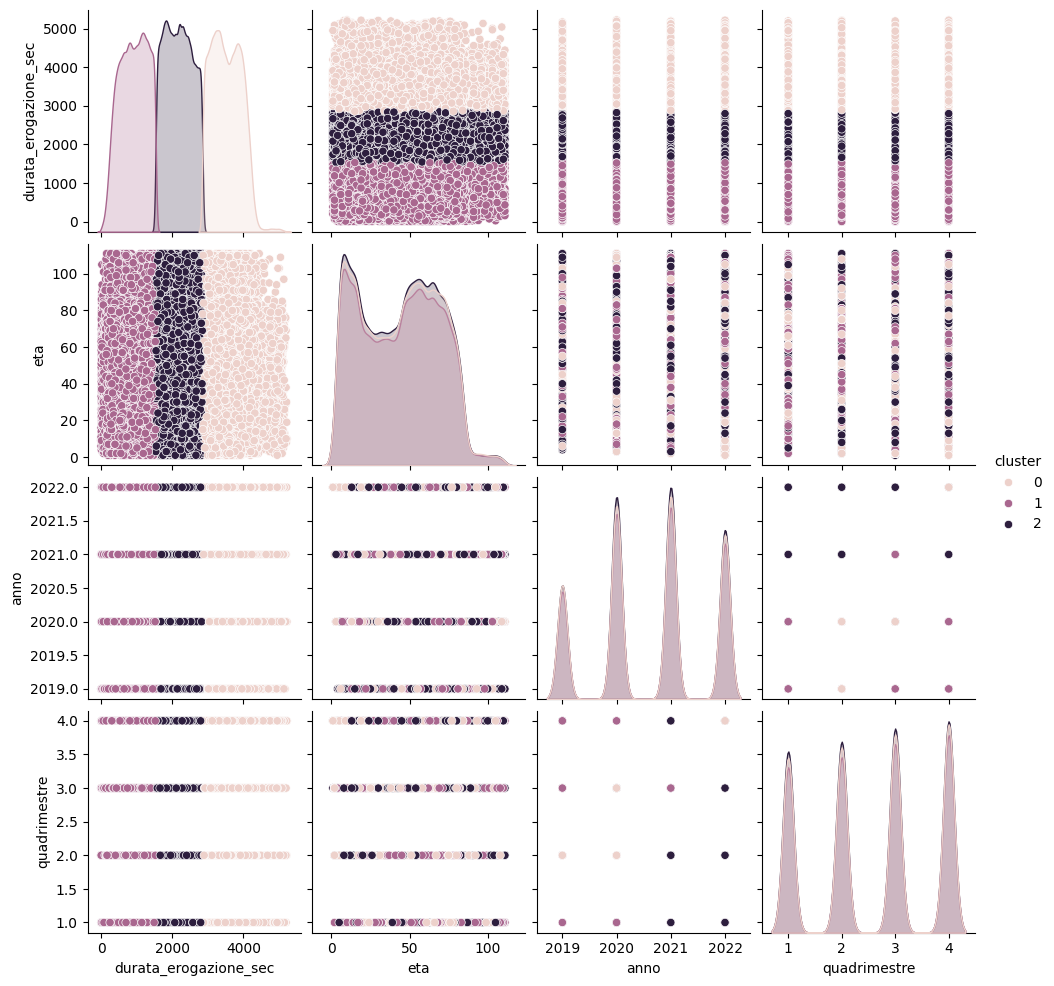

In [ ]:
# Aggiungi i cluster come una nuova colonna al DataFrame
df['cluster'] = clusters

# Crea un pairplot colorando i punti in base al cluster a cui appartengono
sns.pairplot(df, hue='cluster')

# Mostra il grafico
plt.show()